#**Creating a Classification report for Training a Model 'model_v10' on Dataset**<br>

---

###**Evaluation metrics:**
1.      Accuracy
2.      Precision
3.      Recall
4.      F1 score

Model name: 'model_v10'<br>
No. of Gestures on which Ml model is trained on: 5<br>
Total Data points: 5000<br>
Total data points for each class gesture: 1000 <br>
No. of participants from which data is collected: 1 [Name= Jatin] <br>

###**Guestures:**
      No Motion, Left Swing, Right Swing, Adduction, Flexion


Author: Jatin Kadge<br>
EE23D021<br>
Date: 25'th Nov 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getcsv_from_raw(file):
  # Replace with your actual CSV file path
  csv_file = file

  # Read the CSV file into a DataFrame
  df = pd.read_csv(csv_file, header=None)

  # Split the first column into timestamp and numerical values
  #df[0] = df[0].str.split(" -> ")
  #df[["timestamp", "values"]] = pd.DataFrame(df[0].tolist(), index=df.index)
  #df.drop(columns=[0], inplace=True)

  # Rename columns
  df.columns = [ "Ax", "Ay", "Az", "Gx", "Gy","Gz", "timestamp"]

  # Reordering columns
  f = df[["timestamp", "Ax", "Ay", "Az", "Gx", "Gy", "Gz"]]

  return f

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
left_swing = getcsv_from_raw("/content/drive/MyDrive/Wearable_devices_newdata/Data/left-swing_1000-data.csv")
right_swing = getcsv_from_raw("/content/drive/MyDrive/Wearable_devices_newdata/Data/right-swing_1000-data.csv")
no_motion = getcsv_from_raw("/content/drive/MyDrive/Wearable_devices_newdata/Data/no-motion_1000-data.csv")
flexion = getcsv_from_raw("/content/drive/MyDrive/Wearable_devices_newdata/Data/flexion-2_1000-data.csv")
adduction = getcsv_from_raw("/content/drive/MyDrive/Wearable_devices_newdata/Data/adduction-2_1000-data.csv")

####**Assigning unique values to guestures**

In [5]:
def combine_data(gesture, df):
  df['gesture'] = gesture
  return df

In [6]:
final_l = combine_data("Left swing",left_swing)            # left = 1 rough value
final_r = combine_data("Right swing",right_swing)           # right = 2
final_n = combine_data("No motion",no_motion)             # no_motion = 0 rough value
final_adduction = combine_data("Adduction",adduction)     # adduction = 3 rough value
final_flexion = combine_data("Flexion",flexion)         # flexion = 4 rough value

####**Seperating the data into 80:20 ration for Trainin and Testing**

In [7]:
def test_train(d2, file_name):
  # features and output columns for training set 80% of input data
  x_train = d2.iloc[:round(0.8*(d2.shape[0])), :-1]
  y_train = d2.iloc[:round(0.8*(d2.shape[0])), -1]


  # features and output columns for validation set 20% of input data
  x_validation = d2.iloc[round(0.8*len(d2)):, :-1]
  y_validation = d2.iloc[round(0.8*len(d2)):, -1]


  return x_train, y_train, x_validation, y_validation

In [8]:
l_x_train,l_y_train,l_x_validation,l_y_validation = test_train(final_l, "left_swing")
r_x_train,r_y_train,r_x_validation,r_y_validation = test_train(final_r, "right_swing")
n_x_train,n_y_train,n_x_validation,n_y_validation = test_train(final_n, "no_motion")

adduction_x_train,adduction_y_train,adduction_x_validation,adduction_y_validation = test_train(final_adduction, "adduction")
flexion_x_train,flexion_y_train,flexion_x_validation,flexion_y_validation = test_train(final_flexion, "flexion")

####**Preprocessing the Train Test data before pushing it to ML Algorithem**

In [9]:
def convert_to_np(df,k):
  if (k==0):
    n_timesteps = 10
    n_features = 6

    # Load the data from your dataframele\\
    data = df.copy()

    # Drop the timestamp column
    data = data.drop(columns=['timestamp'])

    # Determine the number of samples
    num_samples = len(data) // n_timesteps

    # Trim the data to only include full samples
    data = data.iloc[:num_samples * n_timesteps]

    # Convert the data to a 3D format
    data_3d = data.values.reshape((num_samples, n_timesteps, n_features))

    # Print the shape of the resulting data
    return data_3d
  else:
    df = df.iloc[:df.shape[0]//10]
    x = (np.array(df.values)).reshape(df.shape[0],1)

    return x

In [10]:
# converting the dataframes to numpy arrays for efficient calculation
x_train = convert_to_np(l_x_train,0)
x_train = np.vstack((x_train,convert_to_np(r_x_train,0)))
x_train = np.vstack((x_train,convert_to_np(n_x_train,0)))
x_train = np.vstack((x_train,convert_to_np(flexion_x_train,0)))
x_train = np.vstack((x_train,convert_to_np(adduction_x_train,0)))

y_train = convert_to_np(l_y_train,1)
y_train = np.vstack((y_train,convert_to_np(r_y_train,1)))
y_train = np.vstack((y_train,convert_to_np(n_y_train,1)))
y_train = np.vstack((y_train,convert_to_np(flexion_y_train,1)))
y_train = np.vstack((y_train,convert_to_np(adduction_y_train,1)))

x_validation = convert_to_np(l_x_validation,0)
x_validation = np.vstack((x_validation,convert_to_np(r_x_validation,0)))
x_validation = np.vstack((x_validation,convert_to_np(n_x_validation,0)))
x_validation = np.vstack((x_validation,convert_to_np(flexion_x_validation,0)))
x_validation = np.vstack((x_validation,convert_to_np(adduction_x_validation,0)))


y_validation = convert_to_np(l_y_validation,1)
y_validation = np.vstack((y_validation,convert_to_np(r_y_validation,1)))
y_validation = np.vstack((y_validation,convert_to_np(n_y_validation,1)))
y_validation = np.vstack((y_validation,convert_to_np(flexion_y_validation,1)))
y_validation = np.vstack((y_validation,convert_to_np(adduction_y_validation,1)))

#### **Training the machine learning model over the data**

In [11]:
# converting the numpy arrays to tensors
import tensorflow as tf

def conv_tensor(x):
  t = tf.convert_to_tensor(x.astype('float32'))
  return t

In [12]:
print('TensorFlow ' + tf.__version__)

TensorFlow 2.14.0


Importing the necessary modules for the machine learning model

In [13]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from io import StringIO
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

##### **ML model**

Over here we used a sequential convolutional neural network. The data consisted of m samples, where each sample had 10 subsequent time stamps and each time stamp containing 6 features.

This is a sequential model with the following layers


1. Conv2D layer with 8 filters, kernel size of (3,1) and ReLU activation, with input shape of (n_timesteps, n_features).
2. Another Conv2D layer with 8 filters, kernel size of (3,1) and ReLU activation.
3. A dropout layer with 0.5 dropout rate.
4. A MaxPooling2D layer with pool size of 2.
5. A flatten layer.
6. A dense layer with 20 neurons and ReLU activation.
7. Another dense layer with n_outputs neurons and softmax activation.

The model is compiled with categorical cross-entropy loss, adam optimizer and accuracy metric. It is trained with the given trainX and trainy data for a specified number of epochs and batch size. Finally, the accuracy of the model is evaluated on the testX and testy data.

###### **4**
This is a model having **500 epochs**. This means that the training data will pass throught the model 500 times so that the model can see hidden patterns which were not seen in the initial iterations.

4/4 [==============================] - 0s 4ms/step
Score of experiment >#1: 98.000
4/4 [==============================] - 0s 4ms/step
Score of experiment >#2: 100.000
4/4 [==============================] - 0s 4ms/step
Score of experiment >#3: 100.000
4/4 [==============================] - 0s 3ms/step
Score of experiment >#4: 98.000
4/4 [==============================] - 0s 4ms/step
Score of experiment >#5: 100.000
4/4 [==============================] - 0s 3ms/step
Score of experiment >#6: 99.000
4/4 [==============================] - 0s 5ms/step
Score of experiment >#7: 99.000
4/4 [==============================] - 0s 5ms/step
Score of experiment >#8: 100.000
4/4 [==============================] - 0s 4ms/step
Score of experiment >#9: 100.000
4/4 [==============================] - 0s 4ms/step
Score of experiment >#10: 99.000
Average Classification report:
          class  precision  recall  f1-score  support
0    Adduction      1.000   1.000     1.000     20.0
1      Flexion      0.976 

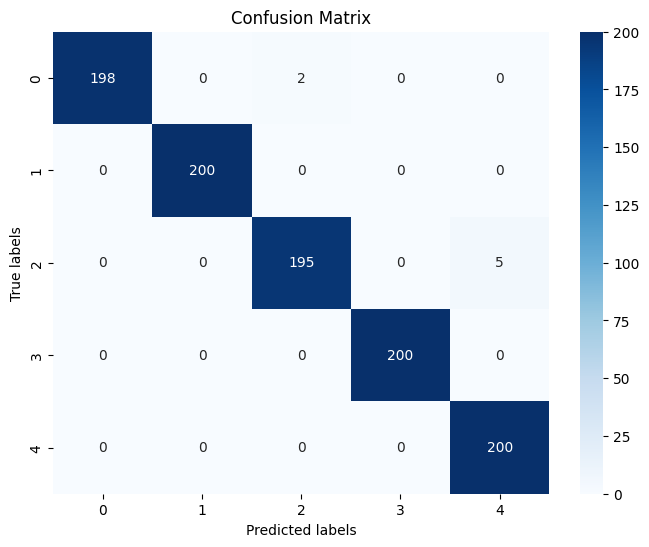

In [23]:
# One-hot encode integer labels
label_encoder = LabelEncoder()
y_train_one_hot0 = label_encoder.fit_transform(y_train.ravel())
y_validation_one_hot0 = label_encoder.fit_transform(y_validation.ravel())

y_train_one_hot = to_categorical(y_train_one_hot0)
y_validation_one_hot = to_categorical(y_validation_one_hot0)

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 500, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv2D(filters=8, kernel_size=(3,1), activation='relu', input_shape=(n_timesteps,n_features,1)))
	model.add(Conv2D(filters=8, kernel_size=(3,1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling2D(pool_size=(2,1)))
	model.add(Flatten())
	model.add(Dense(20, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

	#######SAVING The MODEL
	model.save("/content/drive/MyDrive/Wearable_devices_newdata/ML_models/model_v1060.keras")


	########Loading the model
	loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Wearable_devices_newdata/ML_models/model_v1060.keras")

	# confusion matrix
	y_pred = loaded_model.predict(testX)
	y_true = [np.argmax(testy[i]) for i in range(len(testy))]
	y_pred_classes = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

	confusion_mtx = confusion_matrix(y_true, y_pred_classes)

	# evaluate model
	_, accuracy = loaded_model.evaluate(testX, testy, batch_size=batch_size, verbose=0)

	classifi_report= classification_report(y_true, y_pred_classes, target_names= ["Left swing", "Right swing", "No motion", "Adduction", "Flexion"])

	return accuracy, confusion_mtx, classifi_report

# summarize scores
def summarize_results(scores, scores_list):
	print("Scores of 10 experiments:", scores_list)
	m = mean(scores)
	print('Accuracy: %.3f%% ' % (m))

def average(classification_reports):
	#collecting classification report list string
	combined_classification_report = '\n\n'.join(classification_reports)
	classification_reports_df = pd.read_fwf(StringIO(combined_classification_report))
	#adding column names
	classification_reports_df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']
	#dropping nan values and accuracy, micro avg, weighted avg rows
	classification_reports_df = classification_reports_df.dropna(subset=['class'], axis=0)
	classification_reports_df = classification_reports_df[~classification_reports_df['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]
	#droping index column

	classification_reports_df.reset_index(drop=True, inplace=True)
	#to find average
	numeric_cols = ['precision', 'recall', 'f1-score', 'support']
	classification_reports_df[numeric_cols] = classification_reports_df[numeric_cols].astype(float)
	average_values = classification_reports_df.groupby('class').mean().reset_index()
	print("Average Classification report:\n", average_values)

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = conv_tensor(x_train),conv_tensor(y_train_one_hot),conv_tensor(x_validation),conv_tensor(y_validation_one_hot)
	# repeat experiment

	total_conf = np.zeros([5,5])

	scores = list()
	scores_list = list()

	classification_reports = []

	for r in range(repeats):
		score, confusion_mtx, classifi_report = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		#score = round(score,3)
		score_list = "{:.3f}".format(score)
		print('Score of experiment >#%d: %.3f' % (r+1, score))
		scores.append(score)
		#scores_list.append(float(score_list))
		scores_list.append(score_list)
		total_conf+=confusion_mtx
		classification_reports.append(classifi_report)


	# summarize results
	average(classification_reports)
	summarize_results(scores, scores_list)
	fig, ax = plt.subplots(figsize=(8, 6))
	sns.heatmap(total_conf, annot=True, cmap='Blues', fmt='g', ax=ax)
	ax.set_xlabel('Predicted labels')
	ax.set_ylabel('True labels')
	ax.set_title('Confusion Matrix')
	plt.show()
# run the experiment
run_experiment()